In [1]:
import pandas as pd

In [2]:
#Cargar el archivio
file_path = '/Users/noemipisu/Library/CloudStorage/OneDrive-AlmaMaterStudiorumUniversitàdiBologna/5943 - SERVICE MANAGEMENT/2° ANNO/CIENCIA DE DATOS EN TURISMO/PROYECTOS/CI_Property_Extended_Sept21/CI_Property_Extended_Sept21.csv'
df = pd.read_csv(file_path)
df.head()

/var/folders/vz/rybqyqfj4714wwjgp_lhn83h0000gn/T/ipykernel_23681/978217425.py:3: DtypeWarning: Columns (4,12,25,26,38,39,48,51,59,60,62,63,65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Property ID,Listing Title,Property Type,Listing Type,Created Date,Last Scraped Date,Country,State,City,Zipcode,...,Integrated Property Manager,Amenities,HomeAway Location Type,Airbnb Property Plus,Airbnb Home Collection,License,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager ID
0,ab-48306612,Inviting 3-Bed Villa in Playa Blanca,Villa,Entire home/apt,2021-02-28,2021-10-11,Spain,Las Palmas,Yaiza,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""pool"", ""iron...",NaN,False,NaN,VV-35-3-0002942,48306612.0,310835509.0,NaN,NaN
1,ab-48306645,El loft de Mila,Guest suite,Entire home/apt,2021-07-19,2021-10-09,Spain,Santa Cruz de Tenerife,San Cristóbal de La Laguna,NaN,...,NaN,"[""wireless_internet"", ""kitchen"", ""iron"", ""hair...",NaN,False,NaN,NaN,48306645.0,389885911.0,NaN,NaN
2,ab-48306649,Stunning 2-Bed Villa in Playa Blanca,Villa,Entire home/apt,2021-03-02,2021-10-13,Spain,Las Palmas,Yaiza,NaN,...,NaN,"[""dishwasher"", ""kitchen"", ""wireless_internet"",...",NaN,False,NaN,vv,48306649.0,310835509.0,NaN,NaN
3,ab-48306844,Most Beautiful Location South Tenerife Sea Views,Condominium,Entire home/apt,2021-03-04,2021-06-19,Spain,Santa Cruz de Tenerife,Adeje,NaN,...,NaN,"[""dishwasher"", ""free_parking"", ""beachfront"", ""...",NaN,False,NaN,NaN,48306844.0,356800202.0,NaN,NaN
4,ab-48306961,Ventura Caprice: nuestra casa para 2 con vistas,Residential home,Entire home/apt,2021-03-05,2021-10-03,Spain,Las Palmas,La Oliva,NaN,...,NaN,"[""wireless_internet"", ""free_parking"", ""kitchen...",NaN,False,NaN,NaN,48306961.0,150678647.0,NaN,NaN


In [5]:
#Cargar los datos en la variable 'data'
data = pd.read_csv(file_path)

/var/folders/vz/rybqyqfj4714wwjgp_lhn83h0000gn/T/ipykernel_23681/1404385854.py:2: DtypeWarning: Columns (4,12,25,26,38,39,48,51,59,60,62,63,65) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Selección y limpieza de columnas

In [6]:
#Seleccionar las columnas relevantes
relevant_columns = ['Average Daily Rate (USD)', 'Annual Revenue LTM (USD)', 
                    'Number of Bookings LTM', 'Number of Reviews']


In [7]:
#Filtrar filas que tengan valores nulos en esas columnas
data_filtered = data[relevant_columns].dropna()

Análisis descriptivo

In [8]:
#Obtener estadísticas descriptivas
descriptive_stats = data_filtered.describe()
print(descriptive_stats)

       Average Daily Rate (USD)  Annual Revenue LTM (USD)  \
count              54220.000000              54220.000000   
mean                 122.179044               8462.572556   
std                  119.755841              13966.552005   
min                    1.000000                 10.000000   
25%                   63.470000               1529.000000   
50%                   88.330000               4401.000000   
75%                  137.020000              10028.250000   
max                 2992.850000             658958.000000   

       Number of Bookings LTM  Number of Reviews  
count            54220.000000       54220.000000  
mean                17.874935          14.326964  
std                 21.194565          26.259348  
min                  0.000000           0.000000  
25%                  4.000000           0.000000  
50%                 11.000000           4.000000  
75%                 24.000000          16.000000  
max                240.000000         454.

Distribuciones de los datos

In [48]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [50]:
import matplotlib.pyplot as plt

In [51]:
import seaborn as sns

In [52]:
#Configuración para visualización
sns.set(style="whitegrid")

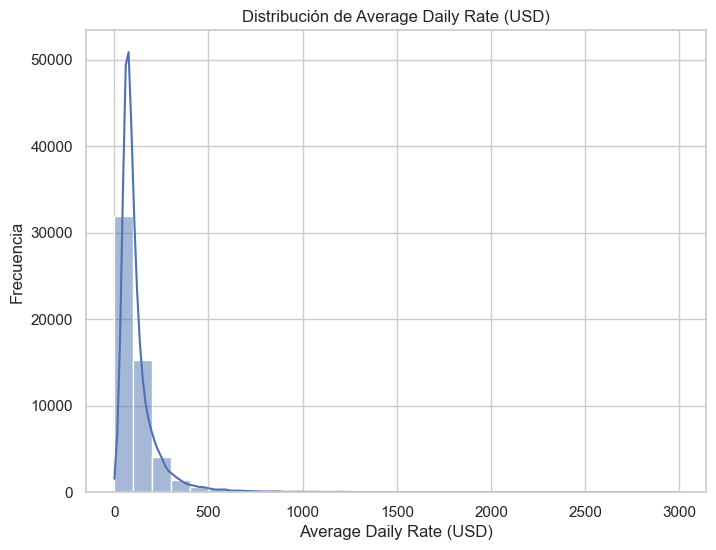

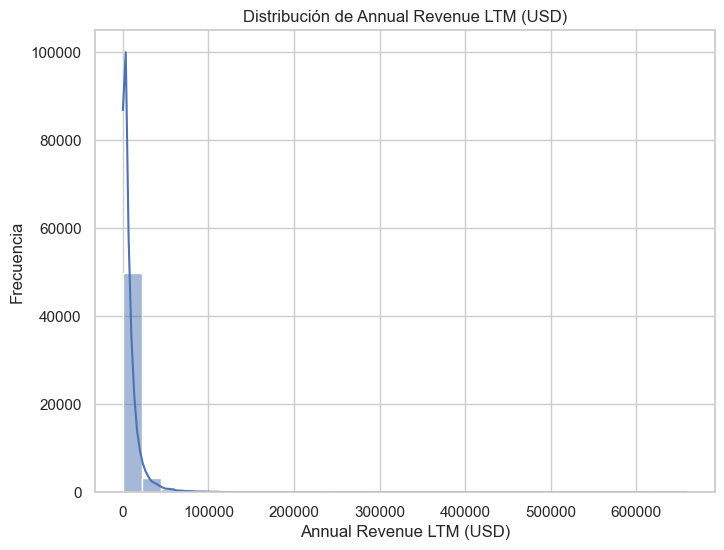

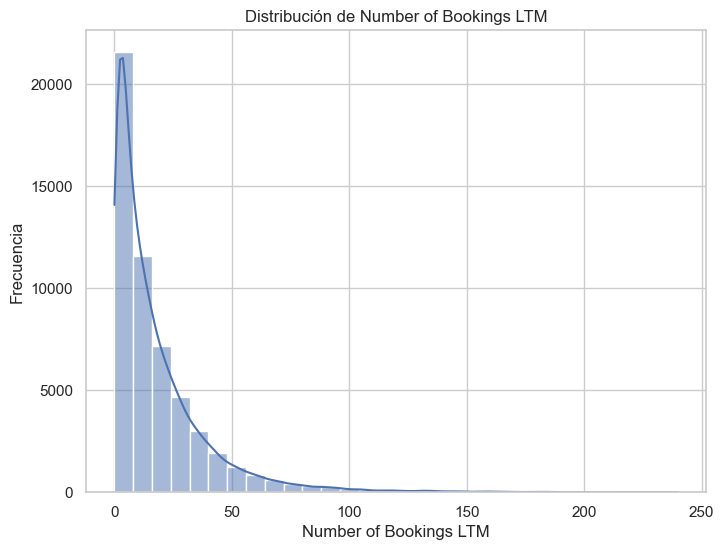

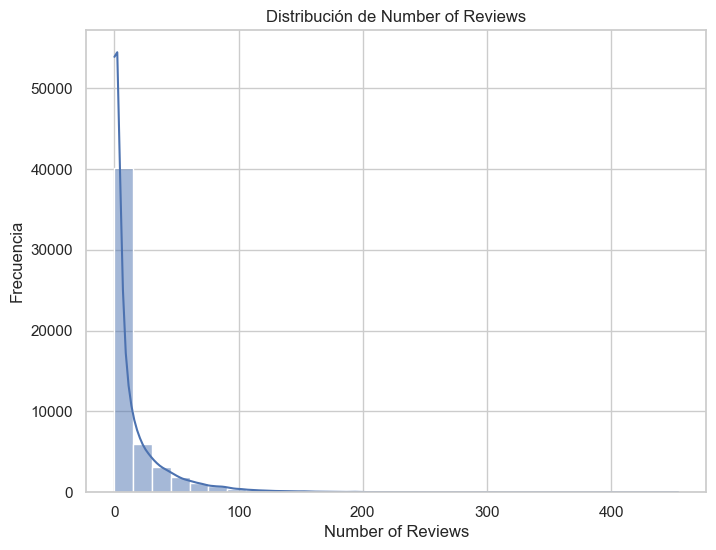

In [53]:
#Crear histogramas para cada columna relevante
for column in relevant_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_filtered[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

Evaluar si los datos siguen una distribución power-law

In [54]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [55]:
import numpy as np

In [56]:
#Función para evaluar si los datos pueden ajustarse a una ley de potencia
def plot_power_law(column):
    #Filtrar los datos positivos, ya que vamos a tomar logaritmos
    data_positive = data_filtered[data_filtered[column] > 0]
    
    #Tomar logaritmos
    log_x = np.log(data_positive[column])
    log_y = np.log(np.arange(1, len(data_positive) + 1)[::-1])  # Rank ordenado inversamente

    #Gráfico log-log
    plt.figure(figsize=(8, 6))
    plt.scatter(log_x, log_y, alpha=0.6)
    plt.title(f'Gráfico log-log para {column}')
    plt.xlabel(f'log({column})')
    plt.ylabel('log(Rango)')
    plt.show()

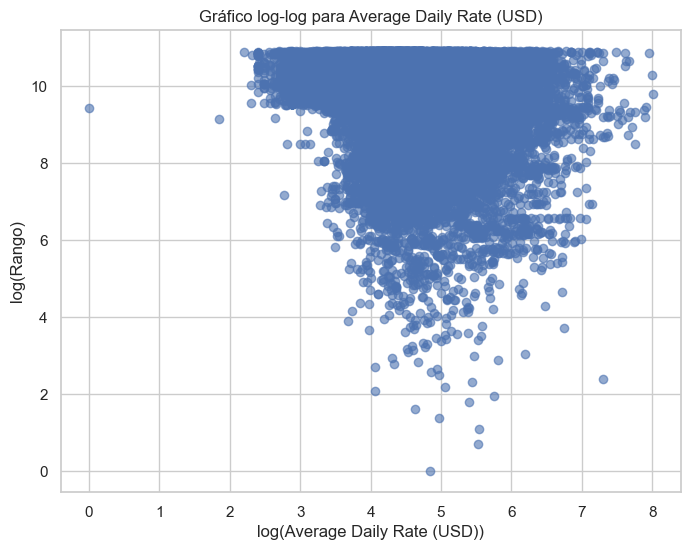

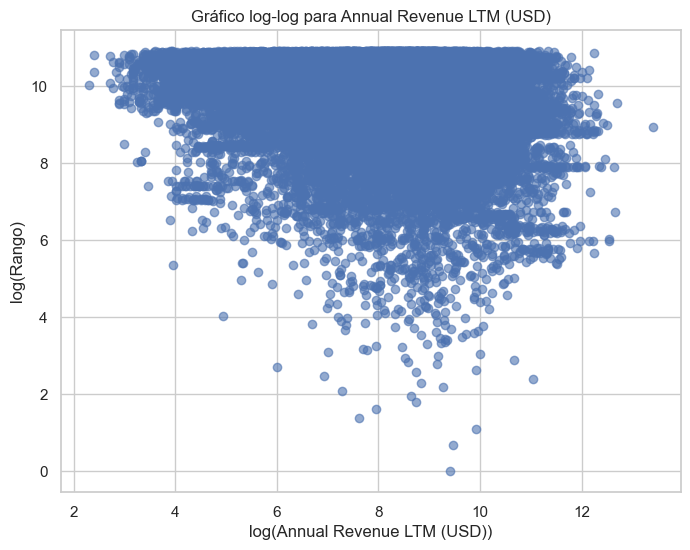

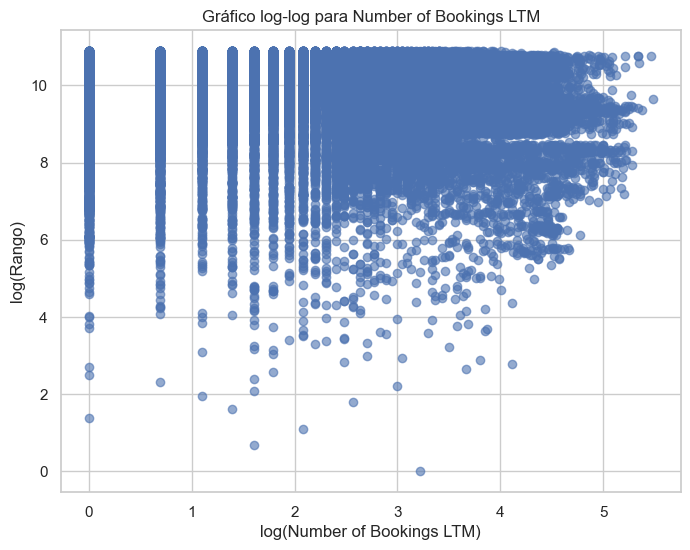

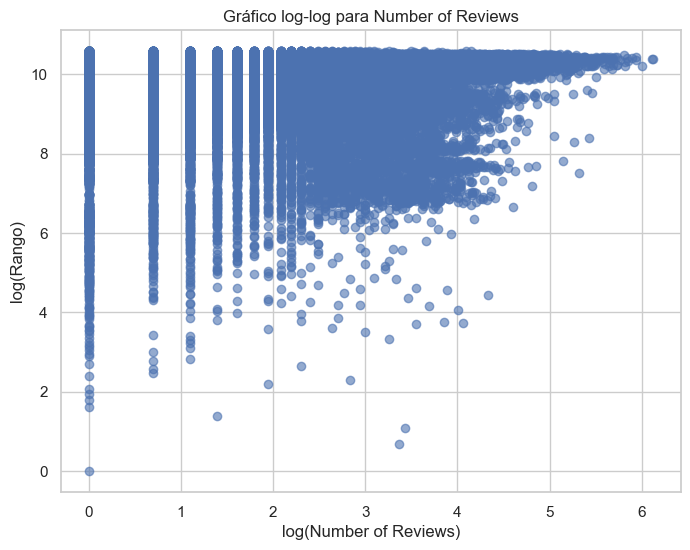

In [57]:
#Evaluar la distribución power-law para cada columna
for column in relevant_columns:
    plot_power_law(column)

Estimar el parámetro α de la power-law

In [59]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 30.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [60]:
from scipy.stats import linregress

In [70]:
#Función para ajustar una recta y estimar alpha
def estimate_alpha(column):
    #Filtrar datos positivos
    data_positive = data_filtered[data_filtered[column] > 0]
    
    #Logaritmos
    log_x = np.log(data_positive[column])
    log_y = np.log(np.arange(1, len(data_positive) + 1)[::-1])  # Rank inverso

    #Ajuste lineal (regresión)
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    
    #Mostrar resultados
    print(f"Estimación del parámetro α para {column}: {abs(slope)}")
    print(f"R-cuadrado: {r_value**2}")

In [62]:
#Estimar el parámetro α para cada columna
for column in relevant_columns:
    estimate_alpha(column)

Estimación del parámetro α para Average Daily Rate (USD): 0.30076721830179415
R-cuadrado: 0.03815319228380948
Estimación del parámetro α para Annual Revenue LTM (USD): 0.09519701629879741
R-cuadrado: 0.020267501239572903
Estimación del parámetro α para Number of Bookings LTM: 0.0009550927675737323
R-cuadrado: 1.3655625850512696e-06
Estimación del parámetro α para Number of Reviews: 0.14883233278975277
R-cuadrado: 0.042743605143886435
